# Redwine Project|Intern Name- Sudhanshu Kumar Singh|Submission Date 09/09/2023

In [ ]:
!pip install imbalanced-learn

In [58]:
#import all relevent library 
#!pip install imbalanced-learn
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import zscore

import warnings
warnings.simplefilter("ignore")
import joblib


%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [29]:
df=pd.read_csv("D:\sks\Flip_Robo_techonology _project\Project_discussion\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
df.shape

(1599, 12)

In [32]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are two types of data int64 and float64. Null value is 0.

# Descriptive Statistcs

In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The described method provides the details of count, mean, standard deviation, min, quartile, and max. I observed that there is a huge gap between maximum and 75 % in fixed quality, regular sugar, and total sugar dioxide. It means outliers are present in the database.

In [34]:
df.skew() # range +/-0.5 is acceptable 

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

skew data implies that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates, and alcohol are all outside the acceptable range of +/- 0.5. It means outliers are present in the database.

In [35]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [36]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Quality array and value_count data indicate red wine quality, and they show the maximum number of data comes under scores 5 and 6. It means imbalances need to be rectified.

In [37]:
#Here qulaity is dependent variable(traget varibale)
df['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

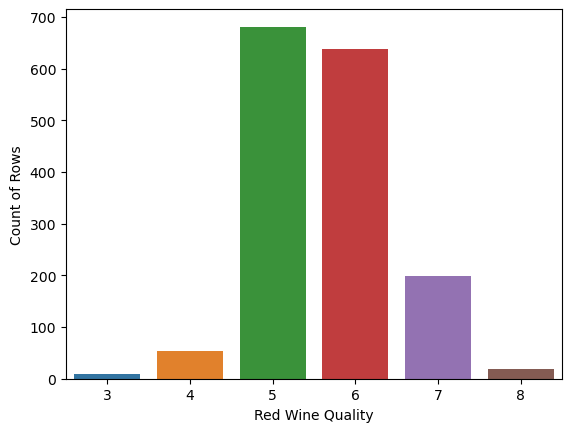

In [38]:
sns.countplot(x ='quality', data = df)
plt.xlabel('Red Wine Quality')
plt.ylabel('Count of Rows')
plt.show()

In the countplot, x labels show the quality of red wine and y labels show the row count of the data set. It is also indicating that quality scores 5 and 6 are higher. This indicated a variance.

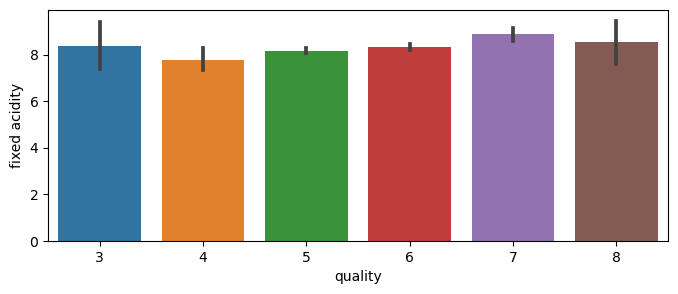

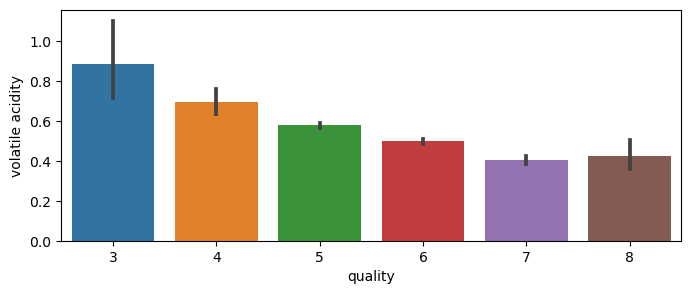

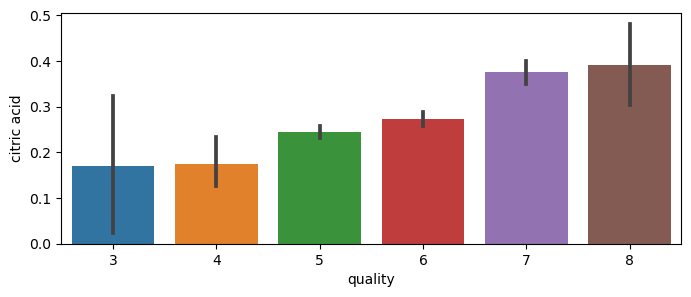

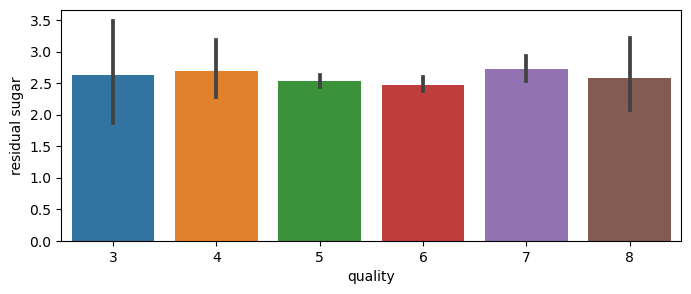

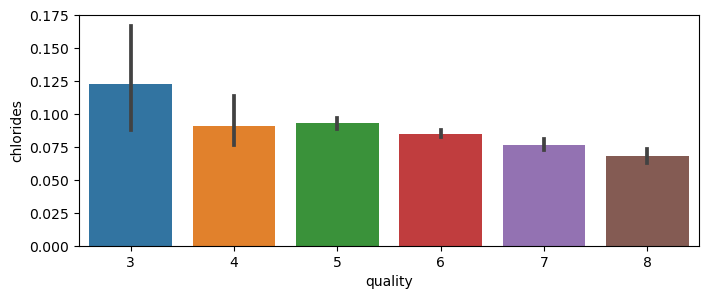

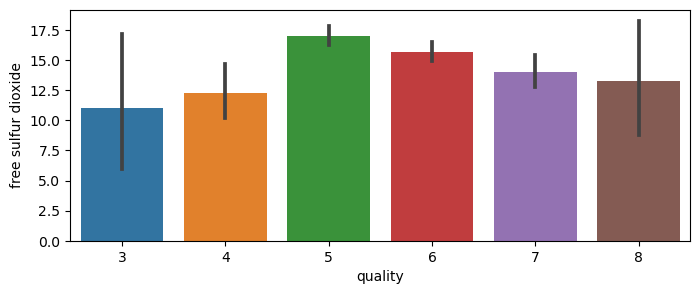

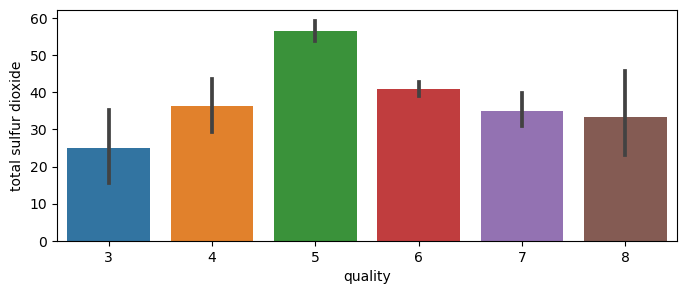

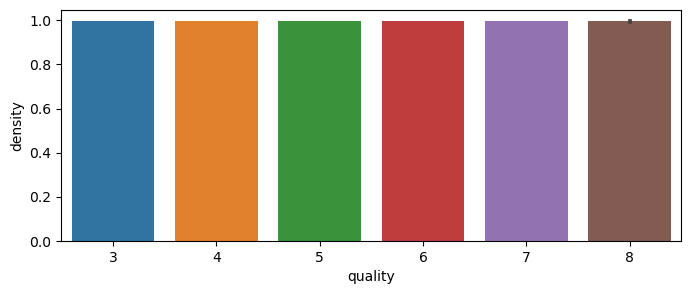

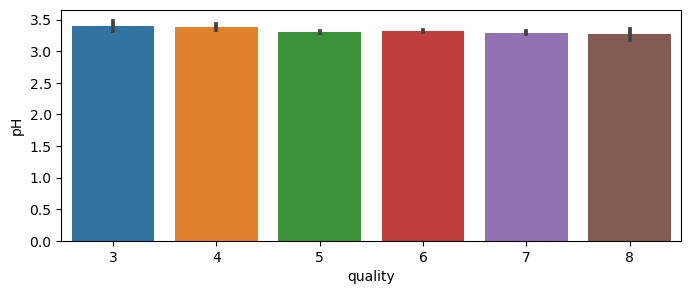

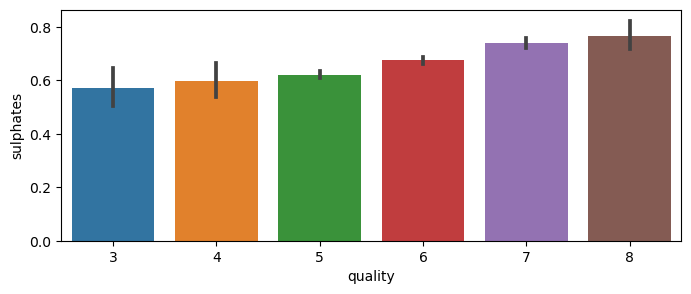

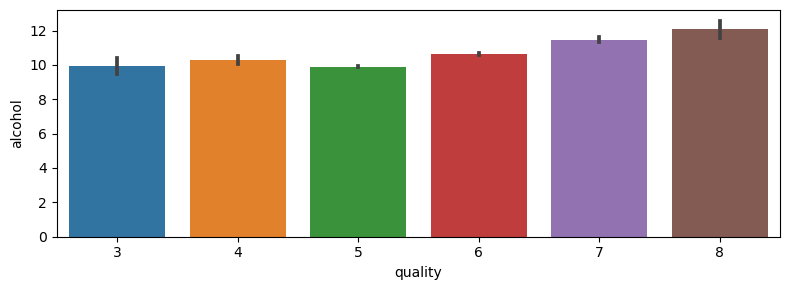

In [39]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(8,3))
    sns.barplot(x=labels, y=col[index], data=df)
plt.tight_layout()
plt.show()

With the help of Barplot,to get better quality of wine. we can conclude that citric acid,sulphates and alchohal are playing a major role.

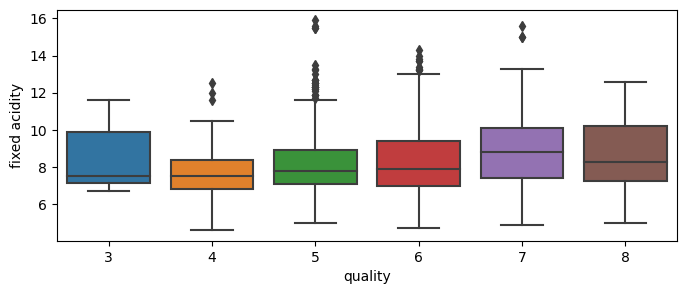

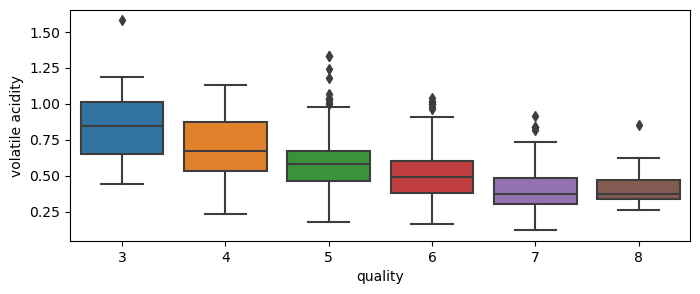

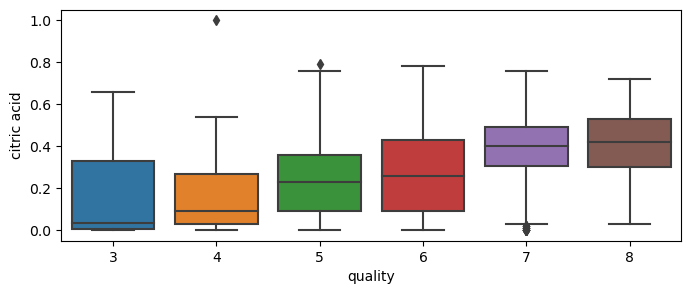

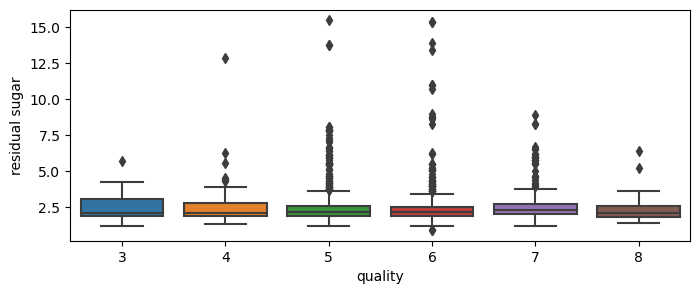

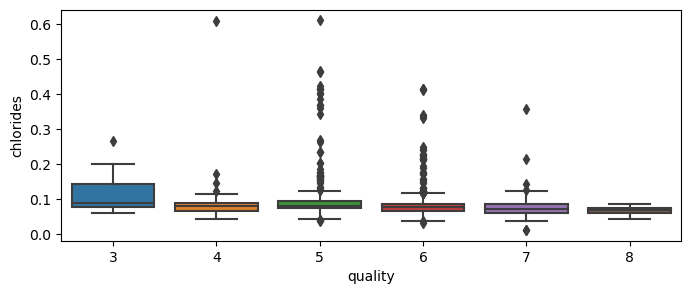

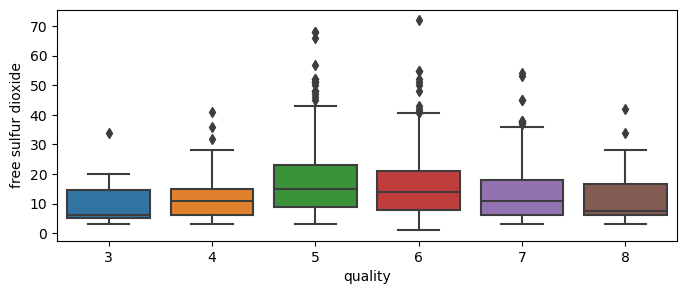

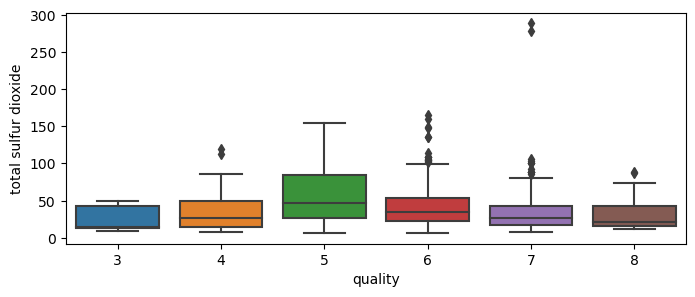

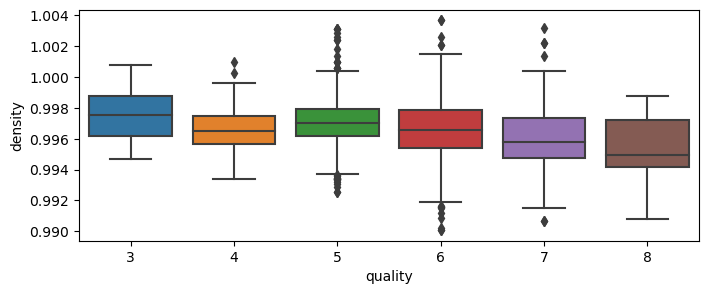

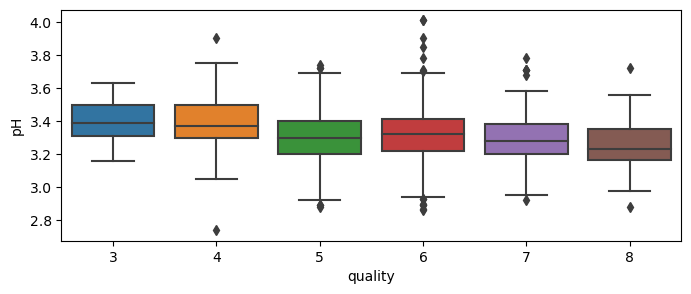

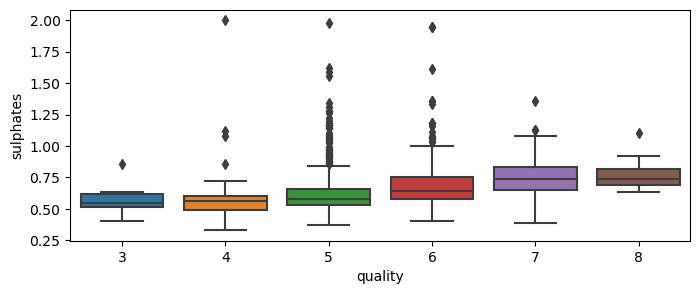

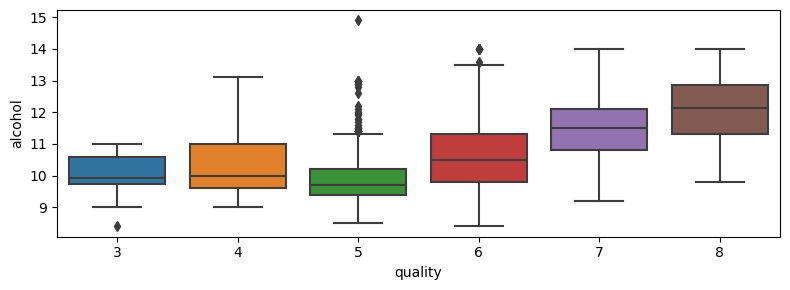

In [40]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(8,3))
    sns.boxplot(x=labels, y=col[index], data=df)
plt.tight_layout()
plt.show()

with the help of barplot we can observe, outlairs are present in data .

# Correlation Matrix 

<AxesSubplot:>

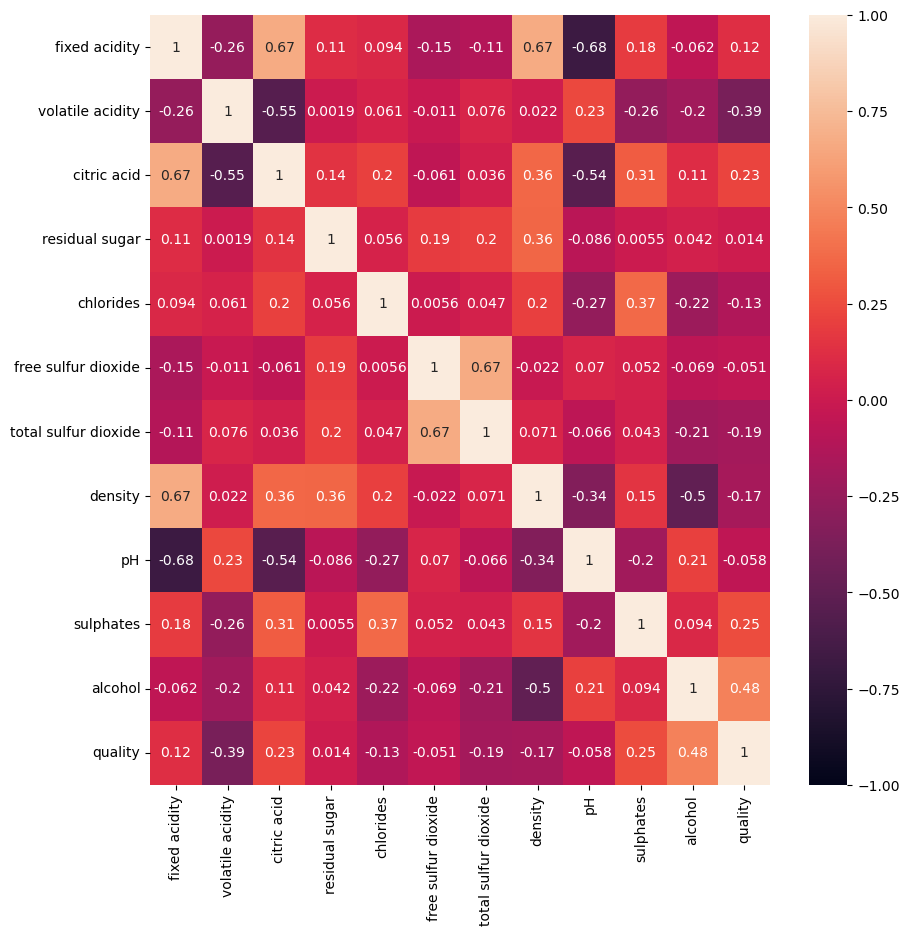

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1,color = "k", annot=True)

+1 correlation (positive correlation) indicates that both variables move in the same direction. -1 correlation (negative correlation) indicates - both the go up and the other variable goes down. As per heat map visualization, col1 fixex acidity and density are a positive correlation with a value 0.67(close to 1). Free sulfur dioxide and total sulfur dioxide are +ive correlated with a value of 0.67 (close to 1). Fixex acidity and PH are negatively correlated with a value -0.68(close to -1)


# Outlier Removal

In [42]:
df.shape

(1599, 12)

In [43]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
df.shape

(1451, 12)

In [45]:
# % of data loss 
data_loss=(1599-1454)/1599*100
data_loss

9.06816760475297

By using a z-score for removing outliers, I lost 9.06% of the data set.

In [46]:
#Need to split the database to bifurcate x(all the features columns) and y(target column) 
X = df.drop('quality', axis=1)
Y = df['quality']

In [47]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [48]:
Y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

There are imbalances in counts, we need to fix them by using oversampling method

In [56]:
#By using oversample mothod, making the quality value eqaul
oversample=SMOTE() 
X,Y = oversample.fit_resample(X,Y)

In [57]:
Y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

# Training and Testing data

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
# took 20 percent dataset for trading purposes and 80 percent for testing purposes 

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(3085, 11) (2468, 11) (617, 11)


# ML for classificaiton and Evauation

In [70]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
# Training the model
    model.fit(X_train, Y_train)
    
# Predicting Y_test
    pred = model.predict(X_test)

# Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
 # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report) 
    
# Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)

# Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [71]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 72.93354943273907

Classification Report:
               precision    recall  f1-score   support

           4       0.86      0.89      0.88       131
           5       0.60      0.54      0.57       124
           6       0.53      0.47      0.50       120
           7       0.81      0.86      0.84       133
           8       0.78      0.87      0.82       109

    accuracy                           0.73       617
   macro avg       0.72      0.73      0.72       617
weighted avg       0.72      0.73      0.72       617

Cross Validation Score: 66.58022690437602

Accuracy Score - Cross Validation Score is 6.3533225283630514


In [72]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 74.23014586709886

Classification Report:
               precision    recall  f1-score   support

           4       0.82      0.86      0.84       131
           5       0.62      0.61      0.62       124
           6       0.57      0.53      0.55       120
           7       0.83      0.75      0.79       133
           8       0.83      0.97      0.90       109

    accuracy                           0.74       617
   macro avg       0.74      0.74      0.74       617
weighted avg       0.74      0.74      0.74       617

Cross Validation Score: 68.81685575364669

Accuracy Score - Cross Validation Score is 5.413290113452163


In [73]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 83.9546191247974

Classification Report:
               precision    recall  f1-score   support

           4       0.89      0.98      0.93       131
           5       0.79      0.70      0.74       124
           6       0.71      0.61      0.65       120
           7       0.83      0.92      0.88       133
           8       0.96      0.98      0.97       109

    accuracy                           0.84       617
   macro avg       0.83      0.84      0.83       617
weighted avg       0.83      0.84      0.83       617

Cross Validation Score: 76.53160453808752

Accuracy Score - Cross Validation Score is 7.423014586709883


In [74]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 84.27876823338735

Classification Report:
               precision    recall  f1-score   support

           4       0.91      0.98      0.94       131
           5       0.78      0.70      0.74       124
           6       0.69      0.62      0.65       120
           7       0.84      0.92      0.88       133
           8       0.98      0.99      0.99       109

    accuracy                           0.84       617
   macro avg       0.84      0.84      0.84       617
weighted avg       0.84      0.84      0.84       617

Cross Validation Score: 79.05996758508914

Accuracy Score - Cross Validation Score is 5.218800648298213
